<h1>NLP MID_TERM: SENTIMENTAL ANALYSIS </h1>

## Introduction

Technology has undergone significant advancements over the centuries, enabling easy access to online purchasing and ordering. With technology becoming an integral part of daily life, individuals frequently share their stories and provide reviews to communicate their experiences. These reviews play a crucial role in guiding others and offering a glimpse of what they can expect or enabling providers to receive feedback for further enhancements.There are variety of reviews, such as product reviews, experiential reviews, video reviews, and movie reviews. For this project, I will focus on analyzing movie reviews.

The problem area I have chosen for this coursework is sentiment analysis in the context of movie reviews  provided by critics. Sentiment analysis involves analyzing digital text to determine the emotional tone of the message, specifically whether it conveys a positive or negative sentiment[1]. The goal is to develop a text classifier that can accurately classify movie reviews based on their sentiment. To carry out this investigation, I will utilize Rotten Tomatoes dataset,Rotten Tomatoes is a prominent platform that aggregates reviews from both critics and viewers. Rotten Tomatoes offers a comprehensive perspective on the quality and reception of movies, making it an ideal source for critical analysis.

## Domain-specific area

For this coursework, I will be addressing the problem of sentiment analysis, specifically focusing on sentiment classification. Sentiment analysis is a powerful tool that involves analyzing digital text to determine the emotional tone of the message, whether it is positive or negative [1]. By conducting sentiment analysis, businesses gain valuable insights into customer feedback about their products or services, especially when the scale of the data is large. This analysis allows businesses to enhance user experiences, improve their products or services, and make informed decisions that align with customer perceptions and preferences.


In this project, I will be developing a text classifier that would classify movie reviews as either positive or negative based on the sentiment expressed in the text. The text classification method I would use is logistic regression. Logistic regression is a algorithm that would predict the probability of a instance belonging to a certain class [2]. To build this classifier, I would be using a a movie reviews dataset which includes their corresponding sentiment already. This dataset will serve as the foundation for training and evaluating the performance of the classifier.

Throughout the project, I have referenced prior works by different authors to guide me in various stages. For preprocessing stage, I relied on the insights provided by Anna Bianca Jones in "Sentiment Analysis of Reviews: Text Pre-processing" [3]. This work has helped me implement effective techniques such as lowercasing, tokenization and negation handling. Additionally, for the development of the classifier and performance measurement, I referred to Prashant Banerjee's tutorial on "Logistic Regression Classifier Tutorial" [3]. This tutorial has provided a comprehensive understanding of logistic regression and its application in text classification tasks, along with guidance on evaluating the classifier's performance using like confusion matrix and ROC cruve.

## Objective 

The objective of this project is to perform sentiment analysis on movie reviews written by critics to provide insights into the sentiment expressed in movie reviews. The project aims to build a robust and accurate sentiment analysis text classifier that can effectively classify movie reviews as either positive or negative based on the emotional tone of the text. By analyzing the sentiments expressed in the reviews, this project will offer valuable insights to the film industry, enabling filmmakers and industry professionals to make informed decisions and enhance the movie-watching experience. To achieve this objective, the project will utilize the Rotten Tomatoes dataset, employ logistic regression as the text classification algorithm, and implement various text preprocessing techniques and performance evaluation measures.

## Dataset

The dataset being used is the "rotten_tomatoes_movie_review" dataset, which contains movie reviews written by critics on the official Rotten Tomatoes website. Rotten Tomatoes is a platform where users can explore movies, access relevant information, and read reviews from both regular users and professional critics .

The dataset was obtained from Kaggle and can be found at the following link: "https://www.kaggle.com/datasets/andrezaza/clapper-massive-rotten-tomatoes-movies-and-reviews?datasetId=3125944&sortBy=dateRun&tab=profile"[13]. It was created by scraping data from the Rotten Tomatoes website as of April 12, 2023. Each record in the dataset represents a critic review published on Rotten Tomatoes and includes all available fields as presented on the website. The dataset file size is 410.69MB.

The dataset was available on Kaggle under the CC0: Public Domain License. This license signifies that the provider of the dataset has handed over their rights to the work according to copyright law, making it freely available to the public domain worldwide. As a result, we can use, modify, distribute, and perform the work without the need for permission.

## Evalution methology

In order to check the performance of the sentiment analysis classifier, the evalution metrics I would apply are metrics of accuracy, precision, recall and F-measure, ROC AUC. Each metrics provide a insight of the ability of the classifier to accurately classify sentiment in the given dataset.

<ul>
<li>Accuracy measures how often the classfier predicts correctly. The acccuracy can be calculated by ratio of correct predictions to the total number of inputs for testing [5].<br>
    Accuracy = Number of correct Predictions / Total number of Inputs</li>
<br>
<li>Precision measures the true positives from all predicted positive instances whether they are false positive or true positive [6].<br>
    Precision = True Positives / (True Positives + False Positives)</li>
<br>
<li>Recall measures the number of true positives over the total of true positives and false negatives [6].<br>
    Recall = True Positives / (True Positives + False Negatives)</li>
<br>
<li>F-measure measures the balanced evaluation of precision and recall<br>
    F1 Score = 2 * (Precision * Recall) / (Precision + Recall)</li>
<br>
<li>
ROC AUC summarizes the overall performance of a classifier</li>
</ul>

## Implementation of sentiment analysis on movie reviews 

In [1]:
# Importing neccessary libraries
import nltk 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import re
import contractions

from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from imblearn.under_sampling import RandomUnderSampler
from sklearn.utils import shuffle
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from spellchecker import SpellChecker
from sklearn import metrics
from sklearn.metrics import roc_curve, roc_auc_score

In [2]:
# Importing the the rotten_tomatoes_movie_reviews csv file to dataframe 
tomatoes_movie_review = pd.read_csv('rotten_tomatoes_movie_reviews.csv')

In [3]:
# showing the headers of dataframe
list(tomatoes_movie_review.columns)

['id',
 'reviewId',
 'creationDate',
 'criticName',
 'isTopCritic',
 'originalScore',
 'reviewState',
 'publicatioName',
 'reviewText',
 'scoreSentiment',
 'reviewUrl']

In [4]:
# Dropping unneccessary columns
tomatoes_movie_review=tomatoes_movie_review.drop(columns=['id',
 'reviewId',
 'creationDate',
 'criticName',
 'isTopCritic',
 'originalScore',
  'reviewState',
 'publicatioName',
'reviewUrl'])
tomatoes_movie_review=tomatoes_movie_review.rename(columns={"reviewText":"criticReview","scoreSentiment":"sentiment"})
print(tomatoes_movie_review.dtypes)

criticReview    object
sentiment       object
dtype: object


In [5]:
print(tomatoes_movie_review)

                                              criticReview sentiment
0        Timed to be just long enough for most youngste...  POSITIVE
1        It doesn't matter if a movie costs 300 million...  NEGATIVE
2        The choreography is so precise and lifelike at...  POSITIVE
3        The film's out-of-touch attempts at humor may ...  NEGATIVE
4        Its clumsy determination is endearing and some...  POSITIVE
...                                                    ...       ...
1444958  Solid but not totally sold&#44; Thor&#58; Ragn...  POSITIVE
1444959  Thor&#58; Love and Thunder is the most enterta...  POSITIVE
1444960  &quot;Thor&#58; Love and Thunder&quot; is a st...  POSITIVE
1444961  Across Taika Waititi&#8217;s film&#44; a war a...  NEGATIVE
1444962  It&#8217;s the jokes that make it&#44; with th...  POSITIVE

[1444963 rows x 2 columns]


## Pre-processing the data

According to Dickinson (2023) [7], the pre-processing process in sentiment analysis involves removing the 'noise' from the dataset by eliminating unnecessary elements and reducing it to its essential components. In the case of the movie review dataset, several pre-processing techniques will be applied:

- Removal of null and duplicate values
- Conversion of text to lowercase
- Handling of contractions
- Removal of special characters
- Tokenization
- Removal of stop words
- Lemmatization
- Spelling check

Through implementation of these techniques could effectively eliminate unnecessary elements, standardize the text format. It would enhance the quality and consistency of the dataset, enabling more accurate and reliable sentiment analysis.

### Removal of null and duplicates from the dataset

The dataset may contain duplicate or null values that do not contribute to the analysis. Therefore, these entries are removed prior to further processing. Initially, there were 1444963 entries in the dataframe

In [6]:
print("Original size: ", tomatoes_movie_review.shape)
print("\n Number of entries that are null: \n",tomatoes_movie_review.isnull().sum())

tomatoes_movie_review=tomatoes_movie_review.dropna()
tomatoes_movie_review = tomatoes_movie_review.drop_duplicates()
tomatoes_movie_review = tomatoes_movie_review.reset_index(drop=True)

print("\n After removal of null and duplicates:", tomatoes_movie_review.shape)

Original size:  (1444963, 2)

 Number of entries that are null: 
 criticReview    69225
sentiment           0
dtype: int64

 After removal of null and duplicates: (1359909, 2)


### Conversion of text to lowercase

By changing the text to lowercase improves the accuracy of text matching and word recognition

In [7]:
tomatoes_movie_review['criticReview']=tomatoes_movie_review['criticReview'].astype(str)
tomatoes_movie_review[['criticReview', 'sentiment']]= tomatoes_movie_review[['criticReview', 'sentiment']].apply\
(lambda x: x.str.lower())

tomatoes_movie_review.head(10)

,criticReview,sentiment
0,timed to be just long enough for most youngste...,positive
1,it doesn't matter if a movie costs 300 million...,negative
2,the choreography is so precise and lifelike at...,positive
3,the film's out-of-touch attempts at humor may ...,negative
4,its clumsy determination is endearing and some...,positive
5,"with every new minute, there's another head-sc...",positive
6,"emotionless reaction shots, zero characterizat...",positive
7,"conceivably, it could serve as a primer for st...",negative
8,"if you're not a fan of garbage cinema, even fo...",negative
9,"""dangerous men,"" the picture's production note...",negative


### Handling of contractions 

Before removing special characters, it is crucial to handle contractions. Usually contractions are shortened words formed by combining two or more words with an apostrophe [8]. It is essential to process these words and expand them to their full form. Failing to address contractions can lead to different interpretations by computers, even though the words have the same meaning. The contractions can be addressed by using the `contractions.fix()` function.

In [8]:
def expansion(review):
    return contractions.fix(review)

tomatoes_movie_review['criticReview'] = tomatoes_movie_review['criticReview'].apply(expansion)
tomatoes_movie_review.head(10)

,criticReview,sentiment
0,timed to be just long enough for most youngste...,positive
1,it does not matter if a movie costs 300 millio...,negative
2,the choreography is so precise and lifelike at...,positive
3,the film's out-of-touch attempts at humor may ...,negative
4,its clumsy determination is endearing and some...,positive
5,"with every new minute, there is another head-s...",positive
6,"emotionless reaction shots, zero characterizat...",positive
7,"conceivably, it could serve as a primer for st...",negative
8,"if you are not a fan of garbage cinema, even f...",negative
9,"""dangerous men,"" the picture's production note...",negative


### Removal of special characters and numbers

The special characters and numbers are addressed here.In sentiment analysis, special characters and numbers are often removed from the text. This is because the focus of the analysis is on understanding the sentiment expressed by the words. And these special characters and numbers does not contribute to the sentiment or emotional tone. So, by removing them, we ensure that the analysis is solely based on the words themselves, leading to more accurate results. Moreover, the presence of symbols and numbers in the text can potentially confuse the sentiment analysis models and lead to incorrect interpretations. Therefore, it is essential to address and remove these special characters.


In [9]:
# replace '-' so that the word is combined
tomatoes_movie_review['criticReview']= tomatoes_movie_review['criticReview'].str.replace(r'-','', regex=True)

#remove numbers 
tomatoes_movie_review['criticReview'] = tomatoes_movie_review['criticReview'].str.replace('\d+', '', regex=True)

#remove the words that are single letter
tomatoes_movie_review['criticReview'] =tomatoes_movie_review['criticReview'].str.replace\
(r'\s+[a-zA-Z]\s+',' ', regex=True)

# removes \n 
tomatoes_movie_review['criticReview']= tomatoes_movie_review['criticReview'].str.replace(r'\n','', regex=True) 

# remove special characters in the data 
tomatoes_movie_review['criticReview'] =tomatoes_movie_review['criticReview'].str.replace\
(r'[^a-zA-Z0-9\s]', '', regex=True)

# removes specific non-printable characters 
tomatoes_movie_review['criticReview'] = tomatoes_movie_review['criticReview'].str.replace\
('[\xa0\t\u2028\u2009]', '', regex=True)

In [10]:
tomatoes_movie_review.head(10)

,criticReview,sentiment
0,timed to be just long enough for most youngste...,positive
1,it does not matter if movie costs million or ...,negative
2,the choreography is so precise and lifelike at...,positive
3,the films outoftouch attempts at humor may fin...,negative
4,its clumsy determination is endearing and some...,positive
5,with every new minute there is another headscr...,positive
6,emotionless reaction shots zero characterizati...,positive
7,conceivably it could serve as primer for stude...,negative
8,if you are not fan of garbage cinema even for ...,negative
9,dangerous men the pictures production notes in...,negative


### Tokenization 

Tokenization is the process of dividing text into individual tokens, which allows for easier analysis and interpretation of the text. In the case of movie reviews, tokenization is performed to facilitate subsequent steps such as stop word removal, lemmatization, and spelling check. By breaking down the text into tokens, we can effectively process and analyze the words in the reviews, enabling more accurate and meaningful analysis of the sentiment expressed in the text.

In [11]:
# Create a function to tokenize the text
def tokenize(col):
    tokens = nltk.word_tokenize(col)
    return [w for w in tokens if w.isalpha()] 

# Apply tokenization on the 'criticReview' column
tomatoes_movie_review['criticReview'] = tomatoes_movie_review['criticReview'].apply(tokenize)

In [12]:
tomatoes_movie_review.head(5)

,criticReview,sentiment
0,"[timed, to, be, just, long, enough, for, most,...",positive
1,"[it, does, not, matter, if, movie, costs, mill...",negative
2,"[the, choreography, is, so, precise, and, life...",positive
3,"[the, films, outoftouch, attempts, at, humor, ...",negative
4,"[its, clumsy, determination, is, endearing, an...",positive


### Stop words removal 

Stop words are removed before performing lemmatization, since the dataset is large, removing stop words helps speed up the lemmatization process.And the stop words are eliminating commonly occurring stop words, which do not contribute much to the overall sentiment analysis, the focus can be placed on more meaningful words that carry the sentiment and context of the text.

In [13]:
stop_words = set(stopwords.words('english'))
filtered_reviews = []

#looping to search for stop words and removing them 
for review in tomatoes_movie_review['criticReview']: 
    not_stopword_tokens = [w for w in review if w not in stop_words]  
    filtered_reviews.append(not_stopword_tokens)

tomatoes_movie_review['criticReview'] = filtered_reviews

In [14]:
tomatoes_movie_review.head(5)

,criticReview,sentiment
0,"[timed, long, enough, youngsters, brief, atten...",positive
1,"[matter, movie, costs, million, dollars, good,...",negative
2,"[choreography, precise, lifelike, points, one,...",positive
3,"[films, outoftouch, attempts, humor, may, find...",negative
4,"[clumsy, determination, endearing, sometimes, ...",positive


### Lemmatization 

Lemmatization is beneficial when the analysis places importance on the meaning of words [9]. In our case, where the meaning of words is crucial, lemmatization playes a valuable role. Lemmatization is the process of reducing the word to its root form,disregarding any inflections or variations [9]. By performing lemmatization, we can enhance the accuracy of the sentimental analysis, as it ensures that words with similar meanings are treated as a single entity.

In [15]:
lemmatizer = WordNetLemmatizer()

tomatoes_movie_review['criticReview'] = tomatoes_movie_review['criticReview'].apply\
(lambda review: [lemmatizer.lemmatize(token) for token in review])

In [16]:
tomatoes_movie_review.head(5)

,criticReview,sentiment
0,"[timed, long, enough, youngster, brief, attent...",positive
1,"[matter, movie, cost, million, dollar, good, g...",negative
2,"[choreography, precise, lifelike, point, one, ...",positive
3,"[film, outoftouch, attempt, humor, may, find, ...",negative
4,"[clumsy, determination, endearing, sometimes, ...",positive


### Spell check 

The last step in the pre-processing process is spell check, which is crucial for any type of review, including movie reviews. Reviews often contain spelling errors, slang, or unidentifiable words. Conducting spell check helps identify and correct these errors, leading to more accurate sentiment analysis. It improves interpretation and prevents misrepresentation of words, ensuring the analysis captures the intended meaning. For this spell check I will be using pyspellchecker library.

In [17]:
spellcheck = SpellChecker()
checked_reviews = []

for review in tomatoes_movie_review['criticReview']: 
    checked_tokens = [w for w in review if spellcheck.known([w])]  
    checked_reviews.append(checked_tokens)
        
tomatoes_movie_review['criticReview'] = checked_reviews

In [18]:
tomatoes_movie_review.head(5)

,criticReview,sentiment
0,"[timed, long, enough, youngster, brief, attent...",positive
1,"[matter, movie, cost, million, dollar, good, g...",negative
2,"[choreography, precise, lifelike, point, one, ...",positive
3,"[film, attempt, humor, may, find, hunting, rea...",negative
4,"[clumsy, determination, endearing, sometimes, ...",positive


### Imbalanced dataset

Performing sentimental analysis on an imbalanced dataset can potentially result in biased analysis. To prevent this, it is important to conduct a check to determine the balance of the dataset before proceeding with the analysis.

In [19]:
positive = np.sum(tomatoes_movie_review['sentiment'] == 'positive')
negative = np.sum(tomatoes_movie_review['sentiment'] == 'negative')
print("Number of positive entries: ", positive)
print("Number of negative entries: ", negative)

Number of positive entries:  911926
Number of negative entries:  447983


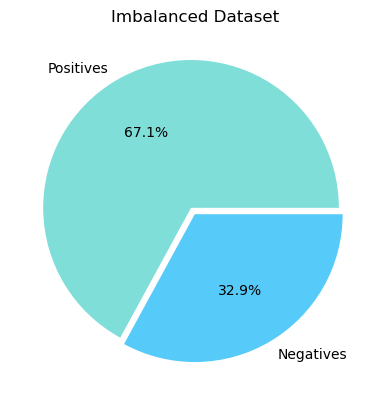

In [20]:
labels = ['Positives', 'Negatives']
counts = [positive, negative]
colors = ['#80DED9', '#56CBF9']
breakpoint = (0.05, 0)
plt.pie(counts,explode=breakpoint,colors=colors, labels=labels, autopct='%1.1f%%')
plt.title('Imbalanced Dataset')
plt.show()

As the pie chart shows the dataset seems to be imbalanced. There is significant difference between the number of positive entries and number of negative entries. Without handling the imbalanced dataset could lead to developing a text classifier that is more biased towards the majority class. So I will be handling this issue by undergoing undersampling. 

### Handling Imbalanced dataset by undersampling

In [21]:
X_data = tomatoes_movie_review['criticReview']
y_data = tomatoes_movie_review['sentiment']
#As the X_data is 1D the function fit_resample causes error as they expect 2D,
# so need to change it to 2D shape using reshape function. 
X_data = X_data.values.reshape(-1, 1)

In [22]:
rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X_data,y_data)

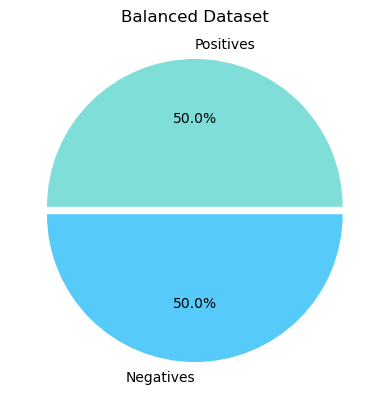

In [23]:
positive_count = sum(y_resampled == 'positive')
negative_count = sum(y_resampled == 'negative')
sizes = [positive_count, negative_count]

plt.pie(sizes, explode=breakpoint, labels=labels, colors=colors, autopct='%1.1f%%')
plt.title('Balanced Dataset')
plt.show()

In [24]:
print("Number of positive entries: ", positive_count)
print("Number of negative entries: ", negative_count)

Number of positive entries:  447983
Number of negative entries:  447983


In [25]:
tomatoes_movie_review = pd.DataFrame({'criticReview': X_resampled.flatten(), 'sentiment': y_resampled})
tomatoes_movie_review.head(10)

,criticReview,sentiment
0,"[matter, movie, cost, million, dollar, good, g...",negative
1,"[film, attempt, humor, may, find, hunting, rea...",negative
2,"[conceivably, could, serve, primer, student, m...",negative
3,"[fan, garbage, cinema, even, fun, dangerous, m...",negative
4,"[dangerous, men, picture, production, note, in...",negative
5,"[entertain, viewer, infuriate, others, clunky,...",negative
6,"[bad, movie, one, awakens, sens, every, often,...",negative
7,"[despite, intriguing, character, dynamic, perf...",negative
8,"[debuting, screenwriter, jason, concocted, red...",negative
9,"[prison, girl, lot, prison, set, exploitation,...",negative


## TF_IDF

The text representation I will be using for the movie review is TF_IDF. TF-IDF stands for Term Frequency-Inverse Document Frequency. It quantifies the importance of a word or phrase in a document within a corpus [11]. TF_IDF can be broken down into two parts: term frequency and inverse document frequency.

Term frequency calculates the number of times a particular term appears in the document [11]. Inverse document frequency measures how common or uncommon a word is across the corpus [11]. The TF-IDF value is obtained by multiplying these two values. When a term has a high TF-IDF score, it is considered more important, whereas a low TF-IDF score indicates lower importance.

As the dataset is large, conducting sentiment analysis on the entire dataset can be resource-intensive and time-consuming. To address this, I will limit the dataset size to 350,000 samples. The samples are randomly chosen from  tomatoes_movie_review['criticReview']. 

Since NLTK does not directly support TF-IDF, I will utilize the scikit-learn library for this purpose. As shown in the code, I will import the `TfidfVectorizer` from `sklearn.feature_extraction.text` to build the TF-IDF vector.

One challenge is that the `fit_transform()` function in `TfidfVectorizer` only accepts filenames, files, or contents as inputs, it does not accept tokenized text [10]. To overcome this, I had to de-tokenize the tokens to convert them back into text format before passing them to `fit_transform()` for processing.

In [26]:
# de-tokenize
tomatoes_movie_review['criticReview'] = tomatoes_movie_review['criticReview'].apply(lambda x: " ".join(x))

size = 350000
tomato_subset = tomatoes_movie_review[['criticReview', 'sentiment']].sample(n=size, random_state=42)

# suffle so its not biase
tomato_subset = shuffle(tomato_subset, random_state=42)

tomato_review = tomato_subset['criticReview']
tomato_sentiment= tomato_subset['sentiment']

# TF-IDF vectorization
tfidf = TfidfVectorizer()
rotten_tomatoes_reviews = tfidf.fit_transform(tomato_review)

## Baseline performance 

The baseline I am going to compare my performance with is Heart Disease Prediction using Logistic Regression, written by Nisha Choondassery [14]. While the topic of my project is sentimental analysis on movie reviews, I acknowledge that setting a baseline from a completely different topic may seem odd at first. However, among the various works I have viewed, Nisha Choondassery's project stood out in terms of its quality and clarity, making it an excellent reference point.

In Nisha's work, she extensively described the approach of using logistic regression and provided clear code examples to illustrate her process. The goal of her project was to build a logistic regression model that utilized factors such as demographic information, behavioral factors, and medical history to predict the likelihood of an individual developing coronary heart disease (CHD) within the next 10 years. Her model achieved an accuracy of 0.88 [14].

While the specific problem domain differs between Nisha's project and mine, I believe that her work serves as an excellent baseline due to its methodological rigor and strong performance. By striving to achieve a similar level of accuracy in my sentiment analysis classifier, I aim to demonstrate the effectiveness and quality of my own approach within the context of sentimental analysis on movie reviews."

## Text Classifier 

Logistic regression is an algorithm used to predict the probability of an instance belonging to a specific class [2]. In this project, we specifically employed binary logistic regression, where the instance can be categorized as either 'positive' or 'negative.'

Logistic regression was chosen as this appraoch holds simplicity, versatility, and straightforwardness as a classification algorithm. In addition, logistic regression is computationally efficient, allowing us to handle large datasets effectively, which is crucial for our project.

I attempted to utilize the Support Vector Machine (SVM) approach but encountered significant processing time and even experienced kernel shutdowns. These challenges led to the realization that SVM may not be the most suitable method for our project. As an alternative, Naive Bayes appeared to be a more appropriate approach, it is easy to understanding, implementation, and faster processing time. However, it is crucial to acknowledge that Naive Bayes is susceptible to the 'zero-frequency problem,' where it assigns zero probability to a categorical variable in the test dataset that was not present in the training dataset[12]. This limitation raises concerns about the accuracy and performance of sentimental analysis for movie reviews, ultimately leading to the decision to not proceed with this approaches. 

To train the classifier, the first step is to separate the data into testing set and the training set. I will be using the ratio of 8:2, 80% for training and 20% for testing.

In [27]:
X_train, X_test, y_train, y_test = train_test_split(rotten_tomatoes_reviews, tomato_sentiment, test_size=0.2)

In [28]:
#  using saga solver, faster for larger dataset
log_reg = LogisticRegression(solver='saga',max_iter=350000)
log_reg.fit(X_train,y_train)

LogisticRegression(max_iter=350000, solver='saga')

In [29]:
predicted_sentiment = log_reg.predict(X_test)

accuracy = accuracy_score(y_test, predicted_sentiment)
precision = precision_score(y_test, predicted_sentiment, average='weighted')
recall = recall_score(y_test, predicted_sentiment,average='weighted')
f1 = f1_score(y_test, predicted_sentiment,average='weighted')

print("Accuracy  =", accuracy*100)
print("Precision =", precision*100)
print("Recall    =", recall*100)
print("F1-Score  =", f1*100)

Accuracy  = 78.78428571428572
Precision = 78.78546317701363
Recall    = 78.78428571428572
F1-Score  = 78.7844152305549


To measure the performance of the classifier, ROC curve can be ploted. It shows the performance of the classification model at various classification threshold levels[4].The ROC Curve is plotted by True Positive Rate against the False Positive Rate (FPR) at various threshold levels.

By plotting the ROC curve, we can visually assess the trade-off between the true positive rate and the false positive rate. A better classifier will have a curve that is closer to the left top corner of the plot, indicating higher sensitivity and lower false positive rate.

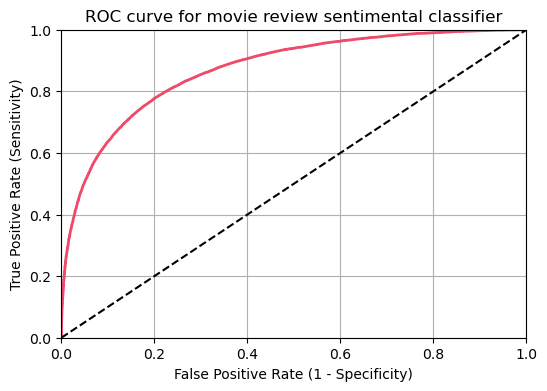

In [30]:
y_pred_prob = log_reg.predict_proba(X_test)[:, 1]

false_pos, true_pos ,threshold= roc_curve(y_test, y_pred_prob, pos_label='positive')

auc = roc_auc_score(y_test, y_pred_prob)
plt.figure(figsize=(6, 4))
plt.plot(false_pos, true_pos, linewidth=2,color='#EE4B6A')
plt.plot([0, 1], [0, 1], 'k--')
plt.title('ROC curve for movie review sentimental classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.grid(True)
plt.show()

The AUC is a metric that represents the overall performance of the classifier. It ranges from 0 to 1, with a higher value indicating better discrimination ability and overall performance [4].

In [31]:
ROC_AUC = roc_auc_score(y_test, y_pred_prob)

print('ROC AUC = ',ROC_AUC*100)

ROC AUC =  87.08909942012778


Confusion matrix

 [[27663  7510]
 [ 7341 27486]]

True Positives(TP) =  27663
True Negatives(TN)   =  27486
False Positives(FP)  =  7510
False Negatives(FN)  =  7341


<Axes: >

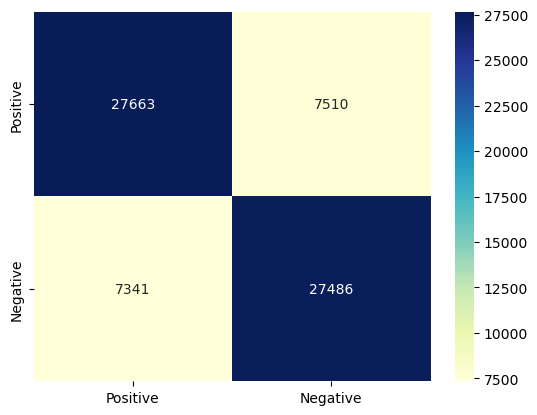

In [32]:
confusion_matrix = metrics.confusion_matrix(y_test, predicted_sentiment)

print('Confusion matrix\n\n', confusion_matrix)

print('\nTrue Positives(TP) = ', confusion_matrix[0,0])
print('True Negatives(TN)   = ', confusion_matrix[1,1])
print('False Positives(FP)  = ', confusion_matrix[0,1])
print('False Negatives(FN)  = ', confusion_matrix[1,0])

cm_matrix = pd.DataFrame(data=confusion_matrix, columns=['Positive', 'Negative'], 
                                 index=['Positive', 'Negative'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

## Evaluation

To evaluate the performance of the built classifier, accuracy, precision, f1, recall, ROC AUC were measured. The results are: 

    Accuracy  = 79.0442857142857
    Precision = 79.04705841034293
    Recall    = 79.0442857142857
    F1-Score  = 79.04409161649515
    ROC AUC   = 87.41824018212467

These metrics provide a quantitative assessment of the classifier's performance in sentiment classification. The accuracy score indicates that approximately 79.04% of the instances were correctly classified. Precision measures the proportion of correctly predicted positive instances out of all instances predicted as positive, yielding a value of  79.04%. Similarly, recall reflects the proportion of correctly predicted positive instances out of all actual positive instances, also resulting in a value of 79.04%. The F1-score, which combines precision and recall, provides an overall measure of classification performance, resulting in a value of 79.04%. These metrics collectively demonstrate the classifier's effectiveness in accurately classifying the sentiment of movie reviews.

In addition to these metrics, the Receiver Operating Characteristic curve provides further insight into the classifier's performance. With an Area Under the Curve value of 87.41%, the classifier demonstrates a strong ability to distinguish between positive and negative sentiments. This high AUC value signifies the classifier's robust discriminatory power and confirms its efficacy in predicting sentiment.

## Conclusion 

With the rotten tomato movie review data, I have successfully executed a series of processes including pre-processing, undersampling, TF-IDF transformation, and training a classifier. As a result, a text classifier has been developed that demonstrates an accuracy of 79.04% in predicting the sentiment of movie reviews. The precision, recall, and F1-score also exhibit a consistent performance of around 79%. These metrics collectively indicate that the classifier can be considered reliable and accurate in performing sentiment analysis on movie reviews.

Furthermore, the ROC AUC value achieved by the classifier is 87.41%, which signifies its strong discriminatory power and ability to differentiate between positive and negative sentiments. Although the my classifier performance did not meet the baseline accuracy of 88%, I believe that in terms of overall performance, the classifier remains reliable and robust.

In conclusion, the objective of analyzing movie reviews written by critics and gaining insights into the expressed sentiment has been accomplished. Additionally, the second objective of constructing an accurate and robust classifier for sentiment analysis has also been successfully achieved.

## REFERENCES: 

[1]What is Sentiment Analysis? - Sentiment Analysis Explained - AWS. (n.d.-b). Amazon Web Services, Inc. https://aws.amazon.com/what-is/sentiment-analysis/

[2]GeeksforGeeks. (2023b). Logistic Regression in Machine Learning. GeeksforGeeks. https://www.geeksforgeeks.org/understanding-logistic-regression/

[3] Jones, A. B. (2018, June 20). Sentiment analysis of reviews: Text Pre-processing - Anna Bianca Jones - Medium. Medium. https://medium.com/@annabiancajones/sentiment-analysis-of-reviews-text-pre-processing-6359343784fb

[4] Prashant. (2020). Logistic Regression Classifier Tutorial. Kaggle. https://www.kaggle.com/code/prashant111/logistic-regression-classifier-tutorial

[5]GeeksforGeeks. (2023b). Evaluation Metrics in Machine Learning. GeeksforGeeks. https://www.geeksforgeeks.org/metrics-for-machine-learning-model/

[6] Precision-Recall. (n.d.). Scikit-learn. https://scikit-learn.org/stable/auto_examples/model_selection/plot_precision_recall.html#:~:text=Precision%20(%20)%20is%20defined%20as%20the,number%20of%20false%20positives%20(%20).&text=Recall%20(%20)%20is%20defined%20as%20the,number%20of%20false%20negatives%20(%20).

[7] Dickinson, L. (2023, February 18). Step by Step Basics: Text Classifier - Towards Data Science. Medium. https://towardsdatascience.com/step-by-step-basics-text-classifier-e666c6bac52b

[8] Ellis, M. (2022). What Are Contractions in Writing? Definition and Examples | Grammarly. What Are Contractions in Writing? Definition and Examples | Grammarly. https://www.grammarly.com/blog/contractions/

[9] Balodi, T. (n.d.). What is Stemming and Lemmatization in NLP? | Analytics Steps. https://www.analyticssteps.com/blogs/what-stemming-and-lemmatization-nlp

[10] sklearn.feature_extraction.text.TfidfVectorizer. (n.d.). Scikit-learn. https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html

[11] Simha, A. (2021). Understanding TF-IDF for Machine Learning. Capital One. https://www.capitalone.com/tech/machine-learning/understanding-tf-idf/

[12] Shah, R. (2021). Naïve Bayes Algorithm’s Advantages and Disadvantages | Kaggle. https://www.kaggle.com/discussions/getting-started/225022

[13]Villa, A. (2023) 🎬 Massive Rotten Tomatoes Movies & Reviews. Available at: https://www.kaggle.com/datasets/andrezaza/clapper-massive-rotten-tomatoes-movies-and-reviews?datasetId=3125944&sortBy=dateRun&tab=profile.

[14]Neisha (2018b) “Heart Disease Prediction using Logistic Regression,” Kaggle [Preprint]. Available at: https://www.kaggle.com/code/neisha/heart-disease-prediction-using-logistic-regression.